## Read STARBUCKS Data

In [11]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('Ulsan_STARBUCKS_list.csv')
df.head()

,Unnamed: 0,s_name,lat,lot,sido_name,gugun_name,doro_address,tel
0,0,울산태화,35.550548,129.298364,울산,중구,"울산광역시 중구 신기길 103, (1층,2층 전체) (태화동)",052-248-6589
1,1,울산옥동,35.535513,129.289651,울산,남구,울산광역시 남구 문수로 329 (옥동),052-227-7982
2,2,울산시청사거리DT,35.537276,129.313613,울산,남구,울산광역시 남구 중앙로 182 (달동),052-273-3312
3,3,울산성남삼거리,35.553215,129.320479,울산,중구,울산광역시 중구 젊음의2거리 33 (성남동),052-212-3346
4,4,울산성남동,35.553969,129.321190,울산,중구,울산광역시 중구 젊음의거리 74 (성남동),052-248-1984


## Length Calculating Function between two point

In [13]:
def get_length(lat1,lon1,lat2,lon2):
    R = 6371e3
    lat1 *= np.pi / 180
    lon1 *= np.pi / 180
    lat2 *= np.pi / 180
    lon2 *= np.pi / 180
    d_lat = lat2 - lat1
    d_lon = lon2 - lon1
    a = np.sin(d_lat/2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(d_lon/2) ** 2
    c = 2 * np.arctan2(a**0.5, (1-a) ** 0.5)
    d = R * c
    return d

## Labeling the Data

<img src="https://trello-attachments.s3.amazonaws.com/59103d52b56a24582f00dc97/5aebc38103119846a74f765c/79486491dafa196b8b2a19c542e0bd9f/image.png"></img>

In [14]:
get_length(35.550548,129.298364,35.5355131,129.2896507)

1848.3591079179876

In [15]:
final_data = pd.read_csv('unlabled_final_data.csv')

In [16]:
final_data = final_data.drop(['Unnamed: 0'],axis=1)

In [17]:
final_data['distance_to_SB'] = 0

In [18]:
final_data.iloc[0]['latitude']

35.38095868063523

In [19]:
df.iloc[0]['lot']

129.298364

In [20]:
# Calculating minimum distance to STARBUCS from each unit cell
for i in range(len(final_data)):
    min_distance = 1e10
    for j in range(len(df)):
        distance = get_length(final_data.iloc[i]['latitude'],final_data.iloc[i]['longitude'],
                             df.iloc[j]['lat'], df.iloc[j]['lot'])
        if(distance < min_distance):
            min_distance = distance
    final_data.loc[i,'distance_to_SB'] = min_distance

In [21]:
final_data = final_data.sort_values(by = ['distance_to_SB'])
final_data.head()

,PR_per_PY,latitude,longitude,SB_score,CLSS,SB_worker_score,distance_to_SB
319,4.753507e+06,35.537216,129.313418,37.268609,4,7.587481,18.845226
341,5.387504e+06,35.539665,129.336618,91.735068,6,15.203293,23.895260
295,9.863784e+06,35.535664,129.290234,9.856892,4,0.626328,55.361825
445,3.807190e+06,35.550001,129.298185,200.612922,5,0.951267,62.919465
258,6.450355e+06,35.532734,129.311139,36.182702,7,2.805681,78.872308


In [22]:
# 500m is affordable when considering go to walk
criteria = 500

In [23]:
final_data['y_label'] = final_data['distance_to_SB'].apply(lambda x : int(x < criteria))
final_data.head()

,PR_per_PY,latitude,longitude,SB_score,CLSS,SB_worker_score,distance_to_SB,y_label
319,4.753507e+06,35.537216,129.313418,37.268609,4,7.587481,18.845226,1
341,5.387504e+06,35.539665,129.336618,91.735068,6,15.203293,23.895260,1
295,9.863784e+06,35.535664,129.290234,9.856892,4,0.626328,55.361825,1
445,3.807190e+06,35.550001,129.298185,200.612922,5,0.951267,62.919465,1
258,6.450355e+06,35.532734,129.311139,36.182702,7,2.805681,78.872308,1


In [24]:
final_data = final_data.drop(['distance_to_SB'], axis=1)

In [25]:
len(final_data[final_data['y_label'] == 1])

111

In [26]:
len(final_data[final_data['y_label'] == 0])

599

There are fifty data for y=1 and 660 for y=0

## Conducting PCA(Principal Component Analysis) to remove collinearity of each feature

Not for component reduction, to eleminate the collinearity from each features

### Standardizing the Dataset

Each features were measured on different scales, it makes sense to standardize the data.

Although all featrues are real valued, let us continue with the transformation of the data onto unist scale (mean=0 and variance = 1)

In [39]:
# changing column order for calculation convinience
col = list(final_data.columns[1:-1]) + list(final_data.columns[[0]])+ list(final_data.columns[[-1]])

In [87]:
final_data = final_data[col]
final_data = final_data.reindex(list(range(len(final_data))))
final_data.head()

,latitude,longitude,SB_score,CLSS,SB_worker_score,PR_per_PY,y_label
0,35.380959,129.341694,29.796767,3,11.287944,1.879607e+06,0
1,35.383626,129.345041,78.290981,4,3.440323,2.439039e+06,0
2,35.401375,129.288085,106.704431,4,0.932416,2.319935e+06,0
3,35.404102,129.285927,61.260468,2,5.867073,3.380989e+06,0
4,35.404126,129.283725,64.346015,4,3.628084,2.211868e+06,0


In [88]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.preprocessing import StandardScaler
ts = minmax_scale([[1],[2],[3],[10],[100]])
ts

array([[0.        ],
       [0.01010101],
       [0.02020202],
       [0.09090909],
       [1.        ]])

In [89]:
ts = robust_scale([[1],[2],[3],[10],[100]])
ts

array([[-0.25 ],
       [-0.125],
       [ 0.   ],
       [ 0.875],
       [12.125]])

In [90]:
ts = StandardScaler().fit_transform([[1],[2],[3]])
ts

array([[-1.22474487],
       [ 0.        ],
       [ 1.22474487]])

In [91]:
std_data = robust_scale(final_data[col[2:-1]])

In [92]:
std_data[:5]

array([[-0.5720813 , -0.5       ,  0.61655798, -0.81660687],
       [ 0.33105994,  0.        , -0.21826744, -0.55783338],
       [ 0.86022325,  0.        , -0.48505714, -0.61292665],
       [ 0.01388893, -1.        ,  0.03988885, -0.12212047],
       [ 0.07135321,  0.        , -0.19829356, -0.66291473]])

### Calculating Covariance Matrix

In [93]:
mean_vec = np.mean(std_data, axis=0)
cov_mat = (std_data - mean_vec).T.dot((std_data - mean_vec)) / (std_data.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 0.80488937  0.05041863 -0.19125257 -0.02496076]
 [ 0.05041863  0.30761487  0.10233078  0.10999081]
 [-0.19125257  0.10233078  5.73895606  0.1296601 ]
 [-0.02496076  0.10999081  0.1296601   0.60664614]]


Eigendecomposition of the raw data based on the cov_mat

In [94]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.03855085  0.10744352 -0.99335759  0.0145057 ]
 [-0.01893682 -0.94563764 -0.09849934  0.30936828]
 [-0.998745    0.01416782 -0.03766296 -0.0298195 ]
 [-0.02576154  0.30663434  0.04604428  0.95036396]]

Eigenvalues 
[5.75162297 0.26468731 0.80379446 0.6380017 ]


Check the orthogonality

In [95]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


Sorting and Print Eigenvalues

In [96]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
5.7516229678428346
0.8037944635889962
0.6380017040074043
0.26468730938832663


Every feature has significance variance

### Calculating PC Score

In [97]:
reduction_eig_vec = np.matrix(eig_vecs).transpose()
reduction_eig_vec

matrix([[ 0.03855085, -0.01893682, -0.998745  , -0.02576154],
        [ 0.10744352, -0.94563764,  0.01416782,  0.30663434],
        [-0.99335759, -0.09849934, -0.03766296,  0.04604428],
        [ 0.0145057 ,  0.30936828, -0.0298195 ,  0.95036396]])

In [98]:
pc_score = std_data * reduction_eig_vec
col_name = []
for i in range(4):
    col_name.append('PC ' + str(i+1))
score_df = pd.DataFrame(pc_score,columns = col_name)
print('Matrix Size : ', score_df.shape[0], ' x ', score_df.shape[1])
score_df.head()

Matrix Size :  710  x  4


,PC 1,PC 2,PC 3,PC 4
0,-0.700084,0.170289,0.565409,-0.886264
1,0.221489,-0.157346,-0.305790,-0.548723
2,0.506107,-0.158132,-0.822598,-0.626998
3,-0.148303,0.903665,-0.025900,-0.421214
4,0.190111,-0.186904,-0.044028,-0.640979


In [99]:
pc_data = pd.concat([final_data[col[0:2]], score_df, final_data[col[-1]]], axis=1)
pc_data.head()

,latitude,longitude,PC 1,PC 2,PC 3,PC 4,y_label
0,35.380959,129.341694,-0.700084,0.170289,0.565409,-0.886264,0
1,35.383626,129.345041,0.221489,-0.157346,-0.305790,-0.548723,0
2,35.401375,129.288085,0.506107,-0.158132,-0.822598,-0.626998,0
3,35.404102,129.285927,-0.148303,0.903665,-0.025900,-0.421214,0
4,35.404126,129.283725,0.190111,-0.186904,-0.044028,-0.640979,0


## Logistic Regression to PC_Data

In [100]:
pc_data.groupby('y_label').mean()

,latitude,longitude,PC 1,PC 2,PC 3,PC 4
y_label,,,,,,
0,35.538912,129.323966,-0.506987,0.053193,-0.304652,0.151601
1,35.545894,129.316214,-1.262355,-0.148370,-0.096300,0.459297


In [101]:
x_col = pc_data.columns[2:-1]
X = pc_data[x_col]
y = pc_data['y_label']

In [102]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression() # class
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [103]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


In [104]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[186   1]
 [ 26   0]]


In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.99      0.93       187
          1       0.00      0.00      0.00        26

avg / total       0.77      0.87      0.82       213



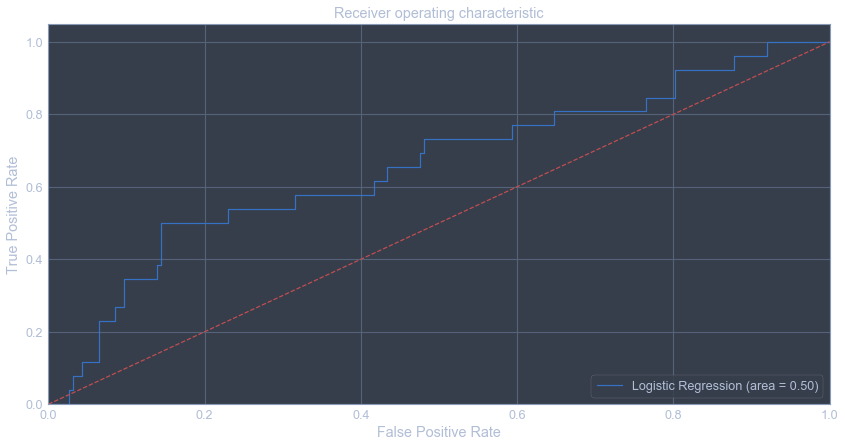

In [106]:
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(14,7))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [107]:
# Weight for each PC features
logreg.coef_

array([[-0.03128696, -0.47232958,  0.46789883,  0.35232891]])

In [108]:
# Probability Fail, Pass
logreg.predict_proba(X.iloc[0].values.reshape(-1,4))

array([[0.84623835, 0.15376165]])

In [109]:
pc_data['prob'] = pd.Series(pc_data.index).apply(lambda x : logreg.predict_proba(X.iloc[x].values.reshape(-1,4))[0][1])

In [110]:
pc_data.sort_values(by = 'prob', ascending=False)

,latitude,longitude,PC 1,PC 2,PC 3,PC 4,y_label,prob
265,35.533466,129.326590,-40.770103,-4.653054,-1.113406,3.248673,0,0.923989
270,35.533623,129.312257,-20.645392,-1.630415,-0.056549,2.208602,1,0.638430
240,35.531063,129.298982,-1.039139,-1.182209,0.699450,3.208375,0,0.610500
472,35.553499,129.308169,-0.316183,-1.660206,0.678584,1.481910,0,0.508629
251,35.531964,129.298996,0.140172,-0.589605,0.546096,2.999176,0,0.496788
263,35.532889,129.296806,0.370737,-0.529184,0.503332,3.106694,0,0.492318
266,35.533478,129.325488,-6.329632,-1.298082,0.113795,1.470647,0,0.446058
284,35.534692,129.296835,0.530968,-1.012954,-0.521732,3.236609,0,0.440016
238,35.530979,129.306700,-13.837568,-1.506579,0.244533,0.191156,1,0.432205
337,35.538898,129.324474,-7.418260,-0.541899,-0.152864,2.565825,0,0.430790


In [111]:
pc_data.to_csv('minmax_with_PCA_result.csv')

# Logistic Regression without PCA

In [112]:
final_data.columns[2:-1]

Index(['SB_score', 'CLSS', 'SB_worker_score', 'PR_per_PY'], dtype='object')

In [113]:
std_data[:5]

array([[-0.5720813 , -0.5       ,  0.61655798, -0.81660687],
       [ 0.33105994,  0.        , -0.21826744, -0.55783338],
       [ 0.86022325,  0.        , -0.48505714, -0.61292665],
       [ 0.01388893, -1.        ,  0.03988885, -0.12212047],
       [ 0.07135321,  0.        , -0.19829356, -0.66291473]])

In [114]:
col_name = final_data.columns[2:-1]
std_df = pd.DataFrame(std_data,columns = col_name)
print('Matrix Size : ', std_df.shape[0], ' x ', std_df.shape[1])
std_df.head()

Matrix Size :  710  x  4


,SB_score,CLSS,SB_worker_score,PR_per_PY
0,-0.572081,-0.5,0.616558,-0.816607
1,0.331060,0.0,-0.218267,-0.557833
2,0.860223,0.0,-0.485057,-0.612927
3,0.013889,-1.0,0.039889,-0.122120
4,0.071353,0.0,-0.198294,-0.662915


In [115]:
std_final_data = pd.concat([final_data[col[0:2]], std_df, final_data[col[-1]]], axis=1)
std_final_data.head()

,latitude,longitude,SB_score,CLSS,SB_worker_score,PR_per_PY,y_label
0,35.380959,129.341694,-0.572081,-0.5,0.616558,-0.816607,0
1,35.383626,129.345041,0.331060,0.0,-0.218267,-0.557833,0
2,35.401375,129.288085,0.860223,0.0,-0.485057,-0.612927,0
3,35.404102,129.285927,0.013889,-1.0,0.039889,-0.122120,0
4,35.404126,129.283725,0.071353,0.0,-0.198294,-0.662915,0


In [116]:
std_final_data.groupby('y_label').mean()

,latitude,longitude,SB_score,CLSS,SB_worker_score,PR_per_PY
y_label,,,,,,
0,35.538912,129.323966,0.279812,-0.062604,0.516834,0.162263
1,35.545894,129.316214,0.038492,0.144144,1.293359,0.375158


In [117]:
x_col = std_final_data.columns[2:-1]
X = std_final_data[x_col]
y = std_final_data['y_label']

In [118]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression() # class
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [119]:
y_pred = lr.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


In [120]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[186   1]
 [ 26   0]]


In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.99      0.93       187
          1       0.00      0.00      0.00        26

avg / total       0.77      0.87      0.82       213



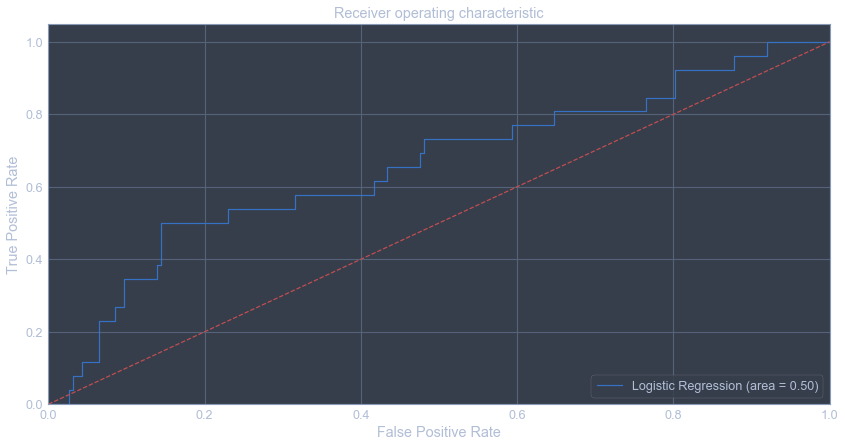

In [122]:
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure(figsize=(14,7))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [123]:
# Weight for each PC features
lr.coef_

array([[-0.46864986,  0.55795629,  0.07620357,  0.17431056]])

In [124]:
# Probability Fail, Pass
lr.predict_proba(X.iloc[0].values.reshape(-1,4))

array([[0.84623835, 0.15376165]])

In [125]:
std_final_data['prob'] = pd.Series(std_final_data.index).apply(lambda x : lr.predict_proba(X.iloc[x].values.reshape(-1,4))[0][1])

In [126]:
std_final_data.sort_values(by = 'prob', ascending=False)

,latitude,longitude,SB_score,CLSS,SB_worker_score,PR_per_PY,y_label,prob
265,35.533466,129.326590,-0.455290,1.0,41.149131,1.089717,0,0.923989
270,35.533623,129.312257,-0.765442,0.0,20.772675,1.296788,1,0.638430
240,35.531063,129.298982,-0.798897,2.0,1.270067,2.647455,0,0.610500
472,35.553499,129.308169,-0.696658,2.0,0.520288,0.869918,0,0.508629
251,35.531964,129.298996,-0.606105,1.5,0.036362,2.653652,0,0.496788
263,35.532889,129.296806,-0.558420,1.5,-0.192062,2.779145,0,0.492318
266,35.533478,129.325488,-0.370970,1.0,6.478878,0.900855,0,0.446058
284,35.534692,129.296835,0.477349,2.0,-0.258989,2.785841,0,0.440016
238,35.530979,129.306700,-0.754071,0.0,13.893642,-0.492436,1,0.432205
337,35.538898,129.324474,-0.189146,0.5,7.546261,2.167772,0,0.430790


In [127]:
std_final_data.to_csv('robust_NO_PCA_result.csv')